In [2]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM
import minimizer

from costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload

In [3]:
%autoreload

# Example 1

## Generate data

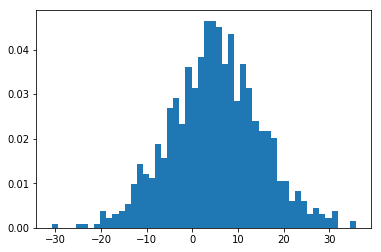

In [4]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [5]:
a = RTBM(1,1)

In [6]:
minim = minimizer.CMA(False)

CMA on 1 cpu(s) enabled


In [8]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=302458, Mon Oct 16 13:46:42 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.462631177855576e+04 1.0e+00 8.96e-01  8e-01  9e-01 0:00.3
    2     16 2.553281959652946e+04 1.2e+00 8.81e-01  8e-01  1e+00 0:00.6
    3     24 8.797842809566442e+03 1.5e+00 8.76e-01  7e-01  1e+00 0:00.9
   15    120 1.044869695095490e+04 2.7e+00 4.56e-01  2e-01  5e-01 0:04.0
   30    240 4.503937763538203e+03 3.8e+00 4.24e-01  2e-01  4e-01 0:08.2
   48    384 4.023180964040786e+03 8.7e+00 2.63e-01  8e-02  3e-01 0:13.3
   67    536 3.773153200947715e+03 1.6e+01 1.33e-01  1e-02  1e-01 0:19.4
   89    712 3.707673841422031e+03 6.0e+01 6.81e-02  2e-03  8e-02 0:26.7
  100    800 3.707602843249106e+03 1.2e+02 3.39e-02  5e-04  4e-02 0:30.4
  128   1024 3.707375945831693e+03 4.4e+02 4.70e-03  3e-05  7e-03 0:39.7
  159   1272 3.707375517211245e+03 2.0e+03 1.34e-03  2e-06  2e-03 0:50.0
  183   1464 3.707375510026470e+03 

## Testing output

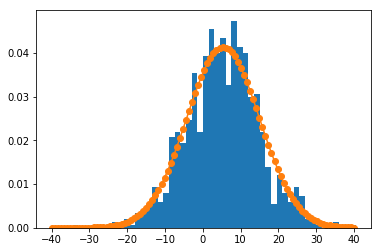

In [7]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

In [ ]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [ ]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

In [ ]:
solution = minim.train(logarithmic, a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')